In [73]:
#===============================================================================================
import sys
sys.path.append(r"C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\Synth")
sys.path.append(r"C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\DAQ")
sys.path.append(r"C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\API\logs")
sys.path.append(r'C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\Exceptions')
sys.path.append(r"C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\HDF5")
sys.path.append(r"C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\diodo")
#===============================================================================================

import Synthesizer
from diodo import AFG310
from DAQ import DAQ
import json
from Continuous_Acquisition import ACQUISITION_CONFIG
import logging
from logging.config import dictConfig
from logs.logging_config import LOGGING_CONFIG
from Exceptions import replace_non_serializable
import numpy as np
import niscope as ni
import time
import matplotlib.pyplot as plt

In [74]:
#===============================================================================================
#Save acquisition configuration parameters for DAQ configuration
#===============================================================================================

filepath = r"C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\Runs"

#===============================================================================================
#Import logger configuration
#===============================================================================================
dictConfig(LOGGING_CONFIG)
logger = logging.getLogger(__name__)
logger.info('START EXECUTION')

devicename = 'PXI1Slot4'
sGen_board = ''


try:
    cfg1 = json.dumps(replace_non_serializable(ACQUISITION_CONFIG))
    logger.info('Dumping acquisition configuration')
    with open(ACQUISITION_CONFIG['acq_conf']['path'] + 'config.json','w') as f:
        f.write(cfg1)
except Exception:
    logger.critical('Dumping acquisition configuration')
    raise SystemError("Could not dump acquisition configuration!")

#===============================================================================================
#Acquire DAQ configuration dictionaries
#===============================================================================================

res = 5.345215443088618
sgen_board = ''
amplitude = 0
f = 0

try:
    daq = DAQ()
    logger.info('DAQ class object correctly created')
except Exception:
    logger.critical('Could not crate DAQ class object')
    raise SyntaxError('Could not create DAQ class object')
'''
try:
    s1 = Synthesizer.Synthesizer(1)
    s1.connettore()
    logger.info('Synth class object correctly created and connected!')
except Exception:
    logger.critical('Could not crate synth class object')
    raise SyntaxError('Could not create synth class object')
'''

channels = {'I'			: 0, 
            'Q'			: 3,
            'trigger'	: 0}


try:
    stat = daq.get_status
    logger.info('DAQ status: '+str(stat))
except Exception:
    logger.critical('Could not get DAQ status!')
    raise SystemError('Could not get DAQ status')

try:
    daq.reset_with_def()
    daq.get_status
    logger.info('Resetting DAQ with defaults')
except Exception:
    logger.error('Could not reset DAQ with defaults')
    pass

try:
    daq.acq_conf = ACQUISITION_CONFIG['acq_conf']
    logger.info('Inserting acquisition configuration from ACQUISITION_CONFIG dictionary')
except Exception:
    logger.warning('Coulkd not insert acquisition configuration')
    raise SystemError('Coulkd not insert acquisition configuration')

try:
    daq.horizontal_conf = ACQUISITION_CONFIG['horizontal']
    logger.info('Inserting hconf dic')
except Exception:
    logger.warning('Could not insert hconf dic')
    raise SystemError('Could not insert hconf dic')

try:
    daq.vertical_conf = ACQUISITION_CONFIG['vertical']
    logger.info('Inserting vconf dic')
except Exception:
    logger.warning('Could not insert vconf dic')
    raise SystemError('Could not insert vconf dic')

try:
    daq.chan_conf = ACQUISITION_CONFIG['chan_conf']
    logger.info('Inserting chan char dic')
except Exception:
    logger.warning('Could not insert chan char dic')
    raise SystemError('Could not insert chan char dic')

try:
    daq.trigger_dic = ACQUISITION_CONFIG['trigger']
    logger.info('Inserting trigger dic')
except Exception:
    logger.warning('Could not insert trigger dic')
    raise SystemError('Could not insert trigger dic')

17:02:38.654 - __main__ - <module> - INFO - START EXECUTION
17:02:38.655 - __main__ - <module> - INFO - Dumping acquisition configuration
17:02:38.657 - __main__ - <module> - INFO - DAQ class object correctly created
17:02:38.658 - __main__ - <module> - INFO - DAQ status: <bound method DAQ.get_status of <DAQ.DAQ object at 0x000000002730AB80>>
17:02:38.659 - __main__ - <module> - ERROR - Could not reset DAQ with defaults
17:02:38.660 - __main__ - <module> - INFO - Inserting acquisition configuration from ACQUISITION_CONFIG dictionary
17:02:38.661 - __main__ - <module> - INFO - Inserting hconf dic
17:02:38.662 - __main__ - <module> - INFO - Inserting vconf dic
17:02:38.663 - __main__ - <module> - INFO - Inserting chan char dic
17:02:38.664 - __main__ - <module> - INFO - Inserting trigger dic


In [79]:
fs = np.linspace(res-0.02,res+0.02,1000)

In [91]:
s1 = Synthesizer.Synthesizer(1)
s1.connettore()

Synth_uno!
Si è connessi al synth_uno!


In [92]:
s1.set_frequency(str(res)+'GHz')
s1.outp_frequency_on()

In [88]:
for f in fs:
    s1.get_frequency()
    time.sleep(1)
    s1.set_frequency(str(fs)+'GHz')

KeyboardInterrupt: 

In [61]:
pulser = AFG310()

In [62]:
#pulser.set_amplitude(1)
pulser.outp_on()
pulser.set_func('SQU')
pulser.set_freq(1e5)
pulser.set_amplitude(1)
pulser.set_offset(0.5)

In [69]:
#mod = 'CONT'
#pulser.trigger_mode(mod)
pulser._diodo.write(f':PULS:DCYC 25')
pulser._diodo.query(f':PULS:DCYC?')

'25\n'

In [49]:
pulser.execute_trigger()

In [27]:
#===============================================================================================
#                                        !GET DATA!
#===============================================================================================

daq._session = ni.Session(devicename)
logger.info('Creating new session!!!')

with daq._session as session:
    logger.info('Configuring channels')
    daq.configure_channels()
    daq.config_trigger()
    I, Q = [], []
    
    for _ in range(10):
        time.sleep(1)
        print(_)
        daq._session.initiate()
        pulser.execute_trigger()
        I.append(session.channels[0].fetch())
        Q.append(session.channels[3].fetch())

15:31:03.385 - __main__ - <module> - INFO - Creating new session!!!
15:31:03.386 - __main__ - <module> - INFO - Configuring channels
0
1
2
3
4
5
6
7
8
9


In [43]:
print(getsizeof(I+))

Channel             : 0
Record              : 0
Absolute X0         : 336,118
Relative X0         : 9.6e-07
dt                  : 1e-06
Offset              : 0
Gain                : 1
Waveform Length     : 100,000



In [17]:
data = {
    'I': [],
    'Q': []
}
for i in range(len(I)):
    data['I'].extend(I[i].samples.tolist())
    data['Q'].extend(Q[i].samples.tolist())

In [18]:
data['T'] = np.arange(0,len(data['I']),1)

Text(0, 0.5, 'Q signal')

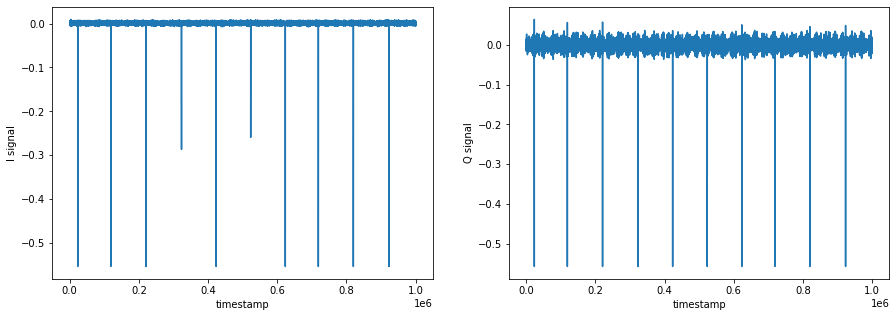

In [19]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(data['T'],data['I'], label='I signal')
axs[1].plot(data['T'],data['Q'], label='Q signal')
axs[0].set_xlabel('timestamp')
axs[0].set_ylabel('I signal')
axs[1].set_xlabel('timestamp')
axs[1].set_ylabel('Q signal')

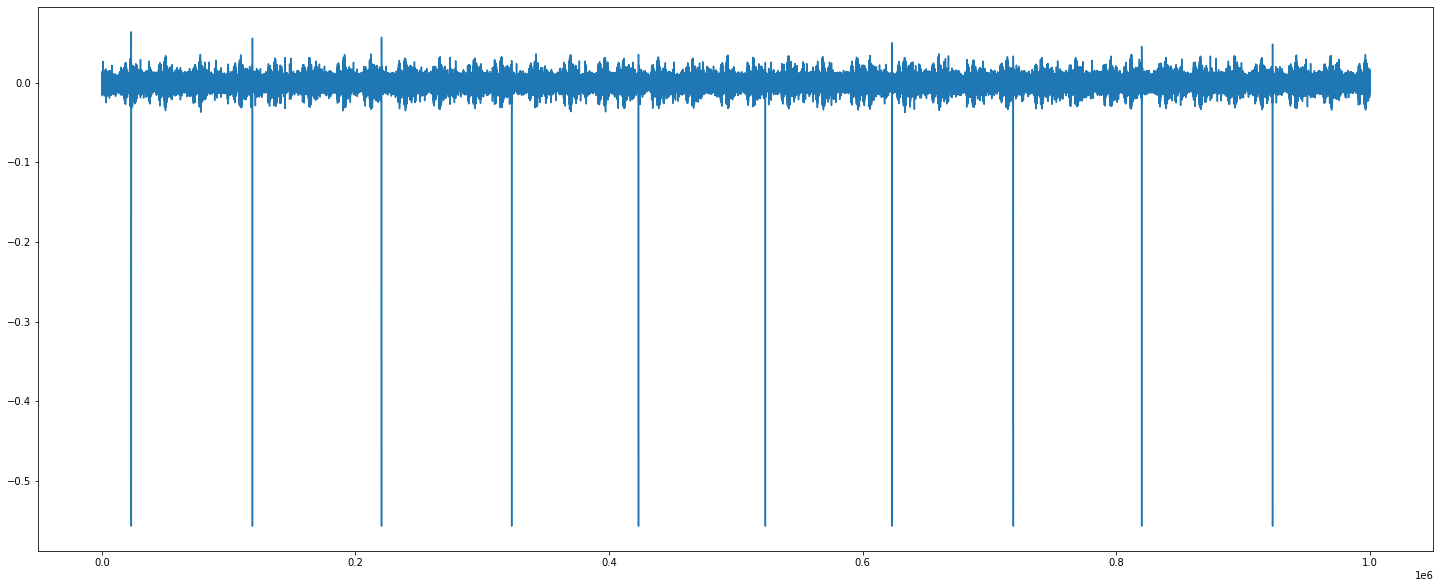

In [20]:
plt.figure(figsize=(25,10))
plt.plot(data['T'],data['Q'])